In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
pd.options.display.max_columns = 999


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.offline import plot, iplot
#init_notebook_mode(connected = True)
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
df_price = pd.read_csv('../data/player_price.csv')
df_stats = pd.read_csv('../data/player_stats.csv')

In [22]:
df_price['Date'] = pd.to_datetime(df_price['timestamp'], unit='ms')
df_price.drop(['timestamp'], axis=1, inplace=True)
df_price['Year']= df_price['Date'].dt.year
df_price['Month'] = df_price['Date'].dt.month
df_price['year_month'] = df_price['Year'].astype(str) + '_' +\
                         df_price['Month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)

In [23]:
df_price.drop(['ps_price'],axis = 1, inplace=True)
df_price.rename(columns={'xbox_price':'price'}, inplace = True)
df_price['Name_ID'] = df_price['player_name'] + "_" +  df_price['player_id'].astype(str)

In [24]:
df_merge=pd.merge(df_price,df_stats,on='player_id', how='inner')

In [26]:
df_merge.revision.value_counts()

Normal          812208
IF               71943
Legend           20748
SIF              13902
OTW               9335
SBC               8617
TOTGS             5572
TOTS              5225
Halloween         4655
CMOTM             4381
TIF               4098
MOTM              3794
Movember          3715
IMOTM             3323
TOTY              1794
AW                1649
StPatrick         1485
FIF               1428
FUT Birthday      1260
Hero               671
Premium SBC        252
RB                  63
HERO                50
TOTS-Reward         27
Name: revision, dtype: int64

In [25]:
df_merge_revision_normal=df_merge[df_merge.revision=='Normal']

In [26]:
df_merge_revision_normal

,price,player_id,player_name,Date,Year,Month,year_month,Name_ID,acceleration,aggression,agility,balance,ball,composure,crossing,curve,defending,diving,dribbling,finishing,fk,handling,heading,interceptions,jumping,kicking,long,marking,pace,passing,penalties,physicality,positioning,raits,reactions,reflexes,shooting,short,shot,sliding,specialities,speed,sprint,stamina,standing,strength,vision,volleys,cam,cb,cdm,cf,cm,lb,lf,lm,lw,lwb,rb,rf,rm,rw,rwb,st,added_on,age,att_workrate,club,def_workrate,foot,height,intl_reputation,league,name,nation,origin,revision,skills,weak_foot,weight,colour,front_scores,overall_score,position,rareness
22109,1730000,2,Cristiano Ronaldo,2016-09-23,2016,9,2016_09,Cristiano Ronaldo_2,91,63,90,63,92,86,84,81,33,0,93,93,77,0,87,29,95,0,72,22,92,81,85,80,94,"['Takes Powerful Driven Free Kicks', 'Flair', ...",96,0,92,82,94,23,"['Speedster', 'Dribbler', 'Distance Shooter', ...",0,92,92,31,80,85,88,89,53,61,91,81,61,91,89,91,65,61,91,89,91,65,91,2016-09-21,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,N\A,Normal,5,4,80,gold,"{'PHY': '80', 'DEF': '33', 'DRI': '91', 'PAS':...",94,LW,rare
22110,1687125,2,Cristiano Ronaldo,2016-09-24,2016,9,2016_09,Cristiano Ronaldo_2,91,63,90,63,92,86,84,81,33,0,93,93,77,0,87,29,95,0,72,22,92,81,85,80,94,"['Takes Powerful Driven Free Kicks', 'Flair', ...",96,0,92,82,94,23,"['Speedster', 'Dribbler', 'Distance Shooter', ...",0,92,92,31,80,85,88,89,53,61,91,81,61,91,89,91,65,61,91,89,91,65,91,2016-09-21,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,N\A,Normal,5,4,80,gold,"{'PHY': '80', 'DEF': '33', 'DRI': '91', 'PAS':...",94,LW,rare
22111,1685727,2,Cristiano Ronaldo,2016-09-25,2016,9,2016_09,Cristiano Ronaldo_2,91,63,90,63,92,86,84,81,33,0,93,93,77,0,87,29,95,0,72,22,92,81,85,80,94,"['Takes Powerful Driven Free Kicks', 'Flair', ...",96,0,92,82,94,23,"['Speedster', 'Dribbler', 'Distance Shooter', ...",0,92,92,31,80,85,88,89,53,61,91,81,61,91,89,91,65,61,91,89,91,65,91,2016-09-21,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,N\A,Normal,5,4,80,gold,"{'PHY': '80', 'DEF': '33', 'DRI': '91', 'PAS':...",94,LW,rare
22112,1585871,2,Cristiano Ronaldo,2016-09-26,2016,9,2016_09,Cristiano Ronaldo_2,91,63,90,63,92,86,84,81,33,0,93,93,77,0,87,29,95,0,72,22,92,81,85,80,94,"['Takes Powerful Driven Free Kicks', 'Flair', ...",96,0,92,82,94,23,"['Speedster', 'Dribbler', 'Distance Shooter', ...",0,92,92,31,80,85,88,89,53,61,91,81,61,91,89,91,65,61,91,89,91,65,91,2016-09-21,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,N\A,Normal,5,4,80,gold,"{'PHY': '80', 'DEF': '33', 'DRI': '91', 'PAS':...",94,LW,rare
22113,1441457,2,Cristiano Ronaldo,2016-09-27,2016,9,2016_09,Cristiano Ronaldo_2,91,63,90,63,92,86,84,81,33,0,93,93,77,0,87,29,95,0,72,22,92,81,85,80,94,"['Takes Powerful Driven Free Kicks', 'Flair', ...",96,0,92,82,94,23,"['Speedster', 'Dribbler', 'Distance Shooter', ...",0,92,92,31,80,85,88,89,53,61,91,81,61,91,89,91,65,61,91,89,91,65,91,2016-09-21,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,N\A,Normal,5,4,80,gold,"{'PHY': '80', 'DEF': '33', 'DRI': '91', 'PAS':...",94,LW,rare
22114,1333889,2,Cristiano Ronaldo,2016-09-28,2016,9,2016_09,Cristiano Ronaldo_2,91,63,90,63,92,86,84,81,33,0,93,93,77,0,87,29,95,0,72,22,92,81,85,80,94,"['Takes Powerful Driven Free Kicks', 'Flair', ...",96,0,92,82,94,23,"['Speedster', 'Dribbler', 'Distance Shooter', ...",0,92,92,31,80,85,88,89,53,61,91,81,61,91,89,91,65,61,91,89,91,65,91,2016-09-21,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,N\A,Normal,5,4,80,gold,"{'PHY': '80', 'DEF': '33', 'DRI': '91', 'PAS':...",94,LW,rare
22115,1309672,2,Cristiano Ronaldo,2016-09-29,2016,9,2016_09,Cristiano Ronaldo_2,91,63,90,63,92,86,84,81,33,0,93,93,77,0,87,29,95,0,72,22,92,81,85,80,94,"['Takes Powerful Driven Free Kicks', 'Flair', ...",96,0,92,82,94,23,"['Speedster', 'Dribbler', 'Distanc

In [7]:
#df_merge_revision_normal.loc[df_merge['price'] > 100000, ['year_month','added_on','player_name','price']]
df_merge_revision_normal.groupby(['Name_ID','year_month'])['price'].last().reset_index()

,Name_ID,year_month,price
0,Abaev_18434,2017_05,1056
1,Abaev_18434,2017_06,1036
2,Abaev_2229,2016_09,600
3,Abaev_2229,2016_10,850
4,Abaev_2229,2016_11,625
5,Abaev_2229,2016_12,1514
6,Abaev_2229,2017_01,1107
7,Abaev_2229,2017_02,742
8,Abaev_2229,2017_03,945
9,Abaev_2229,2017_04,624


In [27]:
df_merge_revision_normal.groupby('year_month')['price'].mean().sort_values(ascending=False)

year_month
2016_10    4996.003220
2016_09    4391.608671
2016_12    4383.307631
2016_11    4352.764055
2017_01    4151.123945
2017_02    3700.745139
2017_03    3680.180924
2017_04    3281.005457
2017_05    2844.671940
2017_06    2636.972940
Name: price, dtype: float64

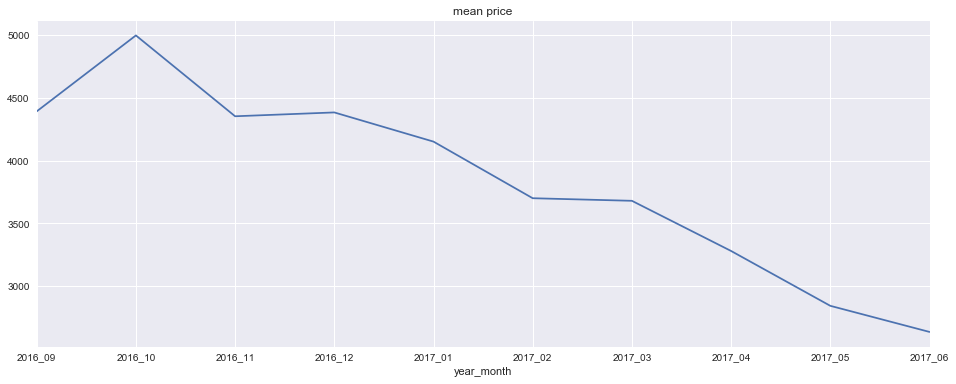

In [28]:
plt.figure(figsize=(16,6))
df_merge_revision_normal.groupby('year_month')['price'].mean().plot()
plt.title('mean price')

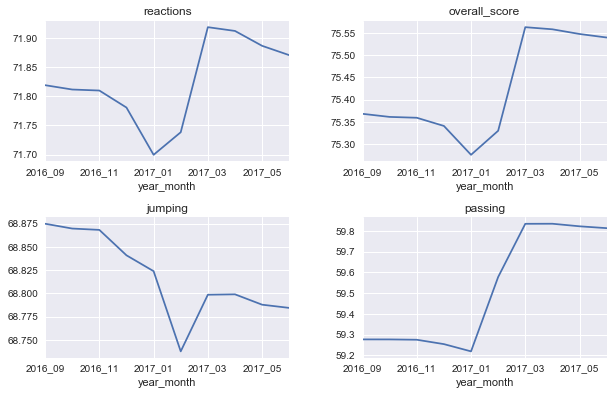

In [38]:
plt.subplot(221)
plt.title('reactions')
df_merge_revision_normal.groupby('year_month')['reactions'].mean().plot()

plt.subplot(222)
plt.title('overall_score')
df_merge_revision_normal.groupby('year_month')['overall_score'].mean().plot()

plt.subplot(223)
plt.title('jumping')
df_merge_revision_normal.groupby('year_month')['jumping'].mean().plot()

plt.subplot(224)
plt.title('passing')
df_merge_revision_normal.groupby('year_month')['passing'].mean().plot()

plt.subplots_adjust(top=1.25, bottom=0.08, left=0.1, right=1.4, hspace=0.4, wspace=0.3)

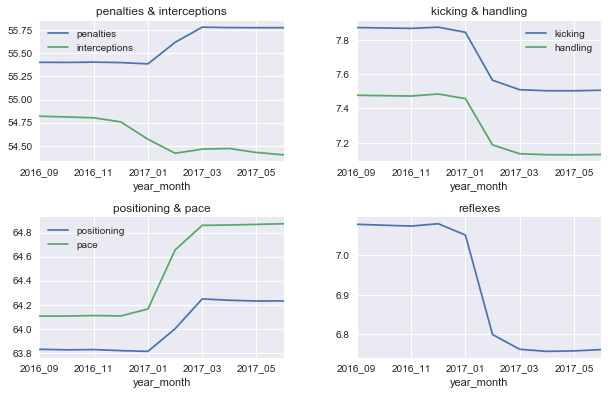

In [30]:
plt.subplot(221)
plt.title('penalties & interceptions')
df_merge_revision_normal.groupby('year_month')['penalties'].mean().plot()
df_merge_revision_normal.groupby('year_month')['interceptions'].mean().plot()
plt.legend()

plt.subplot(222)
plt.title('kicking & handling')
df_merge_revision_normal.groupby('year_month')['kicking'].mean().plot()
df_merge_revision_normal.groupby('year_month')['handling'].mean().plot()
plt.legend()

plt.subplot(223)
plt.title('positioning & pace')
df_merge_revision_normal.groupby('year_month')['positioning'].mean().plot()
df_merge_revision_normal.groupby('year_month')['pace'].mean().plot()
plt.legend()

plt.subplot(224)
plt.title('reflexes')
df_merge_revision_normal.groupby('year_month')['reflexes'].mean().plot()

plt.subplots_adjust(top=1.25, bottom=0.08, left=0.1, right=1.4, hspace=0.4, wspace=0.3)

--------------------------

In [32]:
y = df_merge_revision_normal['price']
y.index = df_merge_revision_normal.Date

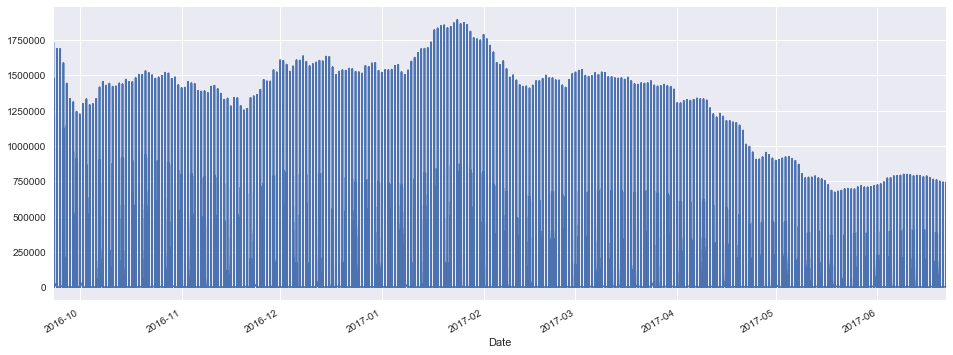

In [33]:
y.plot(figsize=(16,6))

In [34]:
y_otg=y.resample('D', how='mean')

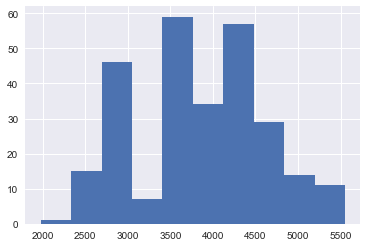

In [35]:
y_otg.hist()

ряд не однородный